In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
train_dir = 'chest_xrays/train'
test_dir = 'chest_xrays/test'

In [20]:
model = models.Sequential()

# Convolutional base (feature extractor)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Deep feed-forward classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [33]:
transformation_ratio= 0.05

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255,brightness_range=(0.5, 0.9),
                                       horizontal_flip=True,
                                       vertical_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=50, class_mode='binary')
val_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=50, class_mode='binary')

Found 4159 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [35]:
# show class indices
print('****************')
for cls, idx in train_generator.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))
print('****************')

****************
Class #0 = normal
Class #1 = pneumonia
****************


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=10,
    validation_data=val_generator, validation_steps=val_generator.samples//val_generator.batch_size,
    verbose=1)

Train for 83 steps, validate for 12 steps
Epoch 1/10
83/83 [==============================] - 46s 553ms/step - loss: 0.0741 - acc: 0.9710 - val_loss: 1.1806 - val_acc: 0.7800
Epoch 2/10
83/83 [==============================] - 47s 566ms/step - loss: 0.0669 - acc: 0.9740 - val_loss: 1.2914 - val_acc: 0.7650
Epoch 3/10
83/83 [==============================] - 47s 563ms/step - loss: 0.0584 - acc: 0.9766 - val_loss: 1.0649 - val_acc: 0.8050
Epoch 4/10
83/83 [==============================] - 46s 558ms/step - loss: 0.0600 - acc: 0.9766 - val_loss: 2.7076 - val_acc: 0.7000
Epoch 5/10
83/83 [==============================] - 45s 542ms/step - loss: 0.0588 - acc: 0.9791 - val_loss: 1.2338 - val_acc: 0.7983
Epoch 6/10
83/83 [==============================] - 47s 569ms/step - loss: 0.0575 - acc: 0.9781 - val_loss: 1.9591 - val_acc: 0.7317
Epoch 7/10
83/83 [==============================] - 45s 539ms/step - loss: 0.0545 - acc: 0.9791 - val_loss: 2.4294 - val_acc: 0.7183
Epoch 8/10
83/83 [=========

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

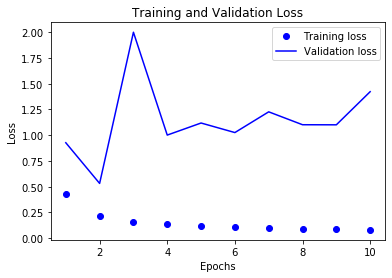

In [11]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

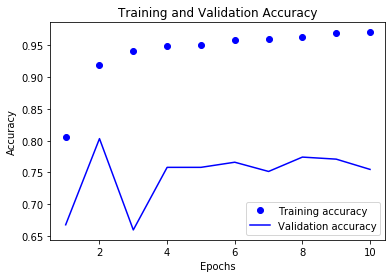

In [12]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Regularized

In [13]:
reg_model = models.Sequential()

# Convolutional base (feature extractor)
reg_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
reg_model.add(layers.MaxPooling2D((2, 2)))
reg_model.add(layers.BatchNormalization())

reg_model.add(layers.Conv2D(64, (3, 3), activation='relu',))
reg_model.add(layers.MaxPooling2D((2, 2)))
reg_model.add(layers.BatchNormalization())

reg_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
reg_model.add(layers.MaxPooling2D((2, 2)))
reg_model.add(layers.BatchNormalization())


reg_model.add(layers.Flatten())
reg_model.add(layers.Dense(256, activation='relu'))
reg_model.add(layers.Dropout(0.5))
reg_model.add(layers.Dense(128, activation='relu'))
reg_model.add(layers.Dropout(0.5))
reg_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
reg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 74, 74, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)      

In [15]:
reg_model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,brightness_range=(0.5, 0.9),
                                       horizontal_flip=True,
                                       vertical_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
val_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 4159 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
# show class indices
print('****************')
for cls, idx in train_generator.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))
print('****************')

****************
Class #0 = normal
Class #1 = pneumonia
****************


In [19]:
history = reg_model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=10,
    validation_data=val_generator, validation_steps=val_generator.samples//val_generator.batch_size,
    verbose=1)

Train for 207 steps, validate for 31 steps
Epoch 1/10
207/207 [==============================] - 51s 246ms/step - loss: 0.3864 - acc: 0.8874 - val_loss: 4.3517 - val_acc: 0.6242
Epoch 2/10
207/207 [==============================] - 50s 241ms/step - loss: 0.2224 - acc: 0.9369 - val_loss: 3.0000 - val_acc: 0.6242
Epoch 3/10
207/207 [==============================] - 50s 241ms/step - loss: 0.1750 - acc: 0.9439 - val_loss: 1.0114 - val_acc: 0.7919
Epoch 4/10
207/207 [==============================] - 50s 239ms/step - loss: 0.1517 - acc: 0.9599 - val_loss: 1.7461 - val_acc: 0.7742
Epoch 5/10
207/207 [==============================] - 50s 242ms/step - loss: 0.1275 - acc: 0.9630 - val_loss: 6.0582 - val_acc: 0.6597
Epoch 6/10
207/207 [==============================] - 53s 258ms/step - loss: 0.1149 - acc: 0.9705 - val_loss: 2.0302 - val_acc: 0.7726
Epoch 7/10
207/207 [==============================] - 68s 327ms/step - loss: 0.1017 - acc: 0.9737 - val_loss: 4.8176 - val_acc: 0.6903
Epoch 8/10
2

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

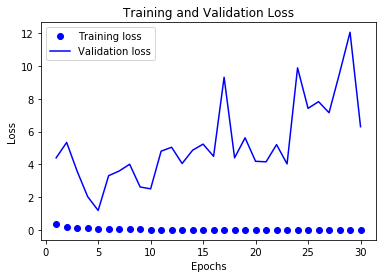

In [28]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

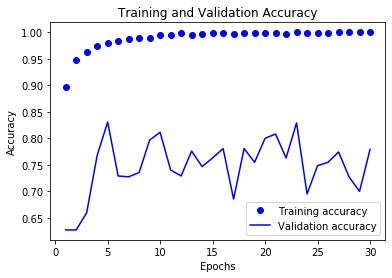

In [34]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()